In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10

from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()    # 데이터 로드

print ("Training data:")
print ("Number of examples: ", X_train.shape)                 # 학습 데이터 스케일
print ("Number of examples: ", X_train.shape[0])
print ("Number of channels:",X_train.shape[3])
print ("Image size:", X_train.shape[1], X_train.shape[2])
print
print ("Test data:")
print ("Number of examples:", X_test.shape)                  # 테스트 데이터 스케일
print ("Number of examples:", X_test.shape[0])
print ("Number of channels:", X_test.shape[3])
print ("Image size:", X_test.shape[1], X_test.shape[2])

170498071/170498071 [==============================] - 13s 0us/step
Training data:
Number of examples:  (50000, 32, 32, 3)
Number of examples:  50000
Number of channels: 3
Image size: 32 32
Test data:
Number of examples: (10000, 32, 32, 3)
Number of examples: 10000
Number of channels: 3
Image size: 32 32


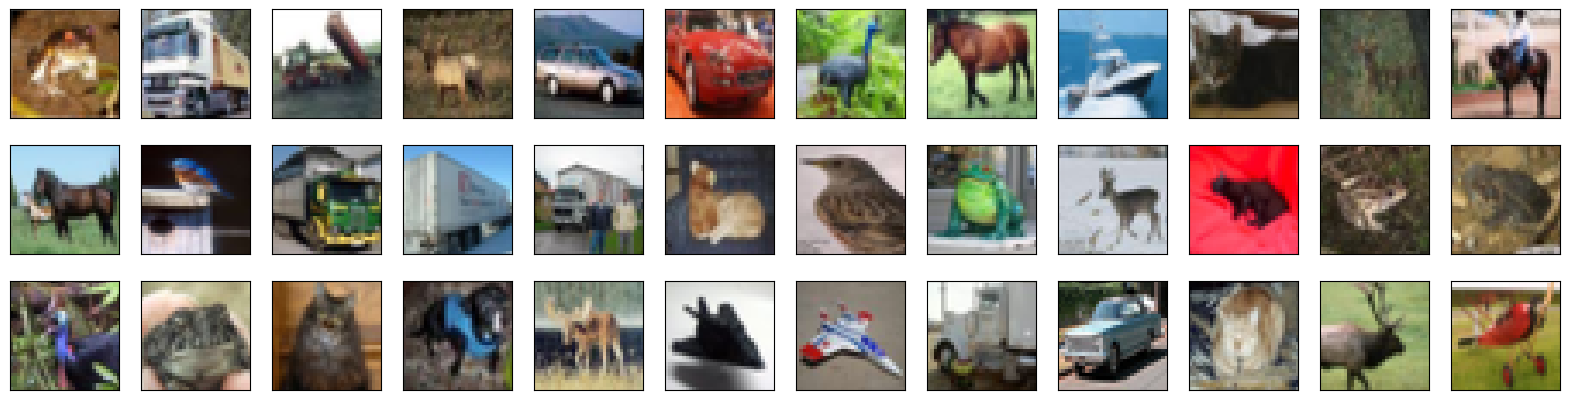

In [ ]:
fig = plt.figure(figsize=(20,5))

for i in range(36):
    ax = fig.add_subplot(3, 12, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i])

In [ ]:
print(X_train[0])

X_train = X_train/255.0              # 정규화
X_test = X_test /255.0
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.3450980

In [ ]:
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
print(Y_train.shape)
print(Y_test.shape)

(50000, 10)
(10000, 10)


In [ ]:
input_shape = (32, 32, 3)     # 행, 열, 채널

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), padding='same',
         input_shape = input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 8, 8, 64)          0         
                                                                 
 flatten (Flatten)           (None, 4096)              0

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3)

# 모델 학습과정 설정하기
model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.Adam(0.001), metrics=['accuracy'])

In [ ]:
# fit() 메서드로 모델 훈련 시키기
hist = model.fit(
    X_train, Y_train,
    epochs = 20, batch_size = 128,
    validation_data=(X_test, Y_test),
    callbacks = [early_stopping]
    )

Epoch 1/20
391/391 [==============================] - 11s 14ms/step - loss: 1.5351 - accuracy: 0.4452 - val_loss: 1.2394 - val_accuracy: 0.5669
Epoch 2/20
391/391 [==============================] - 4s 10ms/step - loss: 1.1973 - accuracy: 0.5729 - val_loss: 1.1647 - val_accuracy: 0.5973
Epoch 3/20
391/391 [==============================] - 5s 12ms/step - loss: 1.0627 - accuracy: 0.6235 - val_loss: 1.0122 - val_accuracy: 0.6483
Epoch 4/20
391/391 [==============================] - 4s 10ms/step - loss: 0.9598 - accuracy: 0.6613 - val_loss: 0.8767 - val_accuracy: 0.6933
Epoch 5/20
391/391 [==============================] - 4s 10ms/step - loss: 0.8824 - accuracy: 0.6877 - val_loss: 0.8615 - val_accuracy: 0.7025
Epoch 6/20
391/391 [==============================] - 4s 11ms/step - loss: 0.8243 - accuracy: 0.7089 - val_loss: 0.7901 - val_accuracy: 0.7271
Epoch 7/20
391/391 [==============================] - 4s 10ms/step - loss: 0.7693 - accuracy: 0.7292 - val_loss: 0.7835 - val_accuracy: 0.729

In [ ]:
# 테스트 데이터로 정확도 측정하기
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('test_acc: ', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.7183 - accuracy: 0.7597
test_acc:  0.7597000002861023


In [ ]:
predit = model.predict(X_test)
print(predit[0:5])
print(Y_test[0 :5])

313/313 [==============================] - 1s 2ms/step
[[4.82296855e-05 7.22043987e-05 5.19897963e-04 3.06291699e-01
  1.74901543e-05 6.90778017e-01 7.58556940e-04 5.02369367e-04
  9.60238161e-04 5.13493396e-05]
 [3.41890031e-04 8.69855508e-02 7.35466843e-09 3.57877923e-08
  6.94396537e-12 2.08020781e-10 4.96227337e-10 5.48128452e-11
  9.12065566e-01 6.06911606e-04]
 [1.10231727e-01 4.27534804e-03 3.97363957e-03 1.23203732e-02
  3.39573668e-03 1.17012905e-03 3.98496741e-05 2.99605587e-03
  8.43257368e-01 1.83397420e-02]
 [7.50034630e-01 2.47512125e-05 5.41254617e-02 2.02730275e-03
  1.10900575e-04 8.38290191e-07 3.83607130e-06 7.82070231e-07
  1.93556324e-01 1.15186238e-04]
 [7.56184271e-09 1.44170201e-07 3.43246721e-02 2.91253835e-01
  3.53527308e-01 9.87899955e-04 3.19904625e-01 1.19655130e-08
  1.51518293e-06 2.43643750e-09]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0

313/313 [==============================] - 1s 2ms/step


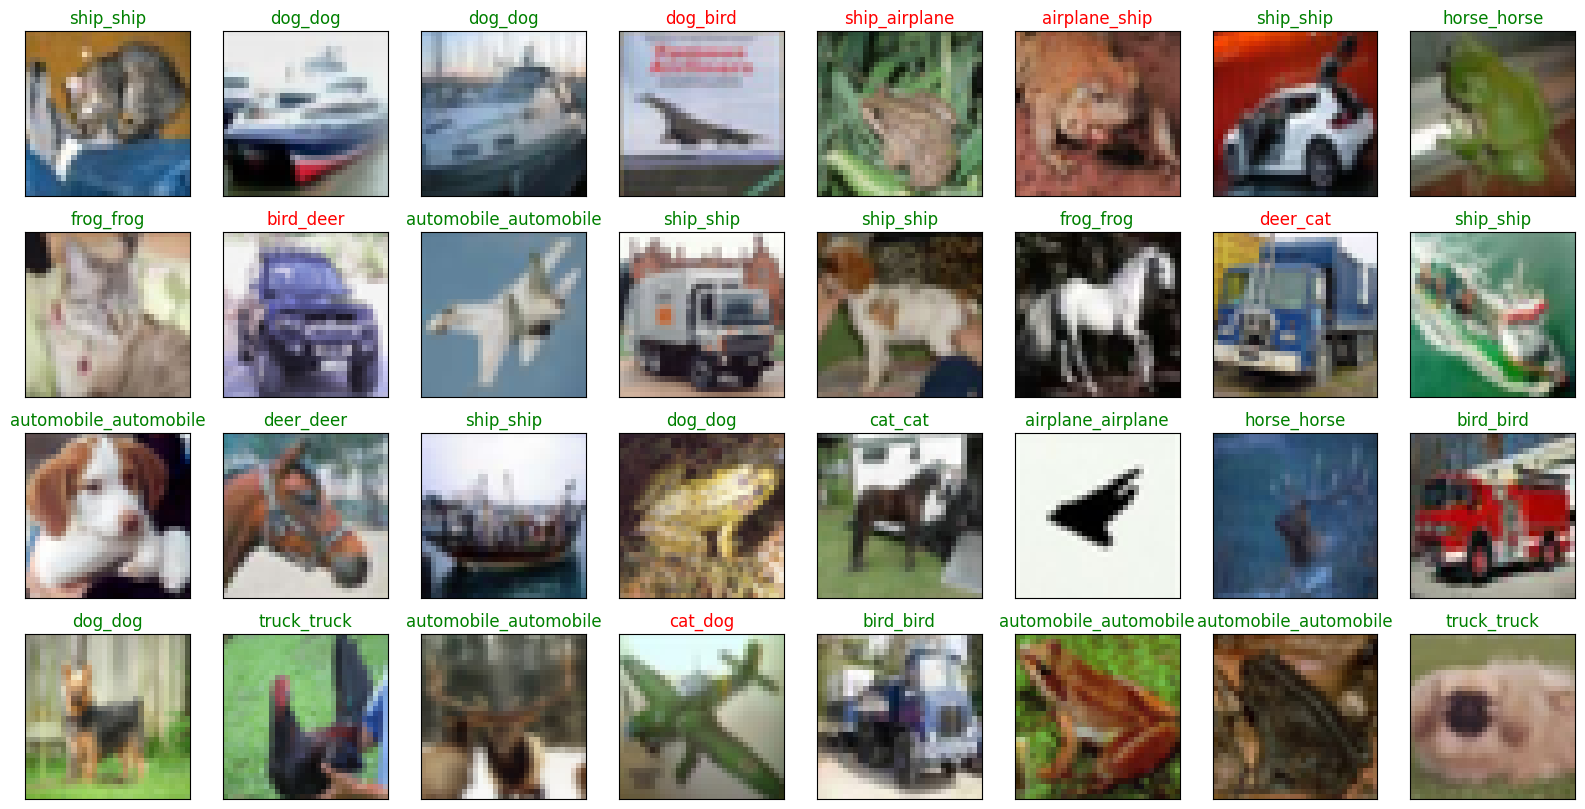

In [ ]:
pred = model.predict(X_test)
label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig = plt.figure(figsize=(20,10))

for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32)):
    ax = fig.add_subplot(4,8, i+1 , xticks=[], yticks=[])
    ax.imshow(X_test[i])

    pred_idx = np.argmax(pred[idx])
    true_idx = np.argmax(Y_test[idx])

    ax.set_title("{}_{}".format(label[pred_idx], label[true_idx]), color='green' if pred_idx == true_idx else 'red')